#### <strong><font color="6EDEC0" size =6>📊Análisis de Bill of Materials (BOM) – Proyecto fotovoltaico</font></strong>

Este notebook realiza un análisis exploratorio de datos sobre la lista de materiales (BOM) de un proyecto fotovoltaico. Se exploran costos, jerarquías de componentes y proveedores.

# **Indice**

- [Paleta de colores](#toc1_)    
- [Extracción de datos](#toc2_)
- [BOM](#toc3_)
- [MRP](#toc4_)
- [Conclusiones](#toc5_)        

## Paleta de colores

<img src="https://raw.githubusercontent.com/Belita-Lili/bom_analysis_droneX100/refs/heads/main/PaletaDeColores/PaletaDeColores.png" alt="inserir alt" width=480>

&nbsp;

|Verde|||
|------|------|------|
| Verde1 |Verde2 |Verde3 |
|#6edec0| #88e6d0| #a3efe0 |
| ![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/bom_analysis_droneX100/refs/heads/main/PaletaDeColores/V1.png)  |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/bom_analysis_droneX100/refs/heads/main/PaletaDeColores/V2.png) |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/bom_analysis_droneX100/refs/heads/main/PaletaDeColores/V1.png) |

&nbsp;

|Verde Claro|||
|------|------|------|
| Verde4 |Verde5 |Verde6 |
|#bdf7ef | #d7ffff| #d2faf4 |
| ![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/bom_analysis_droneX100/refs/heads/main/PaletaDeColores/V4.png)  |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/bom_analysis_droneX100/refs/heads/main/PaletaDeColores/V5.png) |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/bom_analysis_droneX100/refs/heads/main/PaletaDeColores/V6.png) |

&nbsp;

|Verde Grisaceo|||
|------|------|------|
| Verde7 |Verde8 |Verde9 |
|#a7cec8 | #83a9a3| #8f8f8f |
| ![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/bom_analysis_droneX100/refs/heads/main/PaletaDeColores/V8.png)  |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/bom_analysis_droneX100/refs/heads/main/PaletaDeColores/V9.png) |![adicionar desc](https://raw.githubusercontent.com/Belita-Lili/bom_analysis_droneX100/refs/heads/main/PaletaDeColores/V10.png) |

&nbsp;

|Gris||||||
|------|------|------|------|------|------|
|BLANCO| GRIS_1 |GRIS_2 |GRIS_3 |GRIS_4 |GRIS_5 |
|#ffffff | #ebebeb | #d9d9d9| #cccccc | #555655| #231f20 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/BRANCO.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_1.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_3.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_4.png)|![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_5.png)|

&nbsp;


In [153]:
# Adicionamos los colores al proyecto
Verde1,	Verde2,	Verde3 = "#6edec0",	"#88e6d0", "#a3efe0"
Verde4,	Verde5,	Verde6 = "#bdf7ef",	"#d7ffff", "#d2faf4"
Verde7,	Verde8,	Verde9 = "#a7cec8",	"#83a9a3",	"#8f8f8f"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,	GRIS_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
PaletaDeColores = [Verde1,Verde2,Verde3,Verde4,Verde5,Verde6,Verde7,Verde8,Verde9,GRIS_4, GRIS_3, GRIS_2, GRIS_1]

## **Extracción de datos**

## **BOM (Bill of Materials) – Lista de Materiales**
* ¿Qué es?
    * Es un documento o estructura jerárquica que describe todos los componentes, subcomponentes y materias primas necesarias para fabricar un producto.

* ¿Para qué sirve?
    * Para saber qué materiales y en qué cantidad se necesitan para fabricar un producto final.

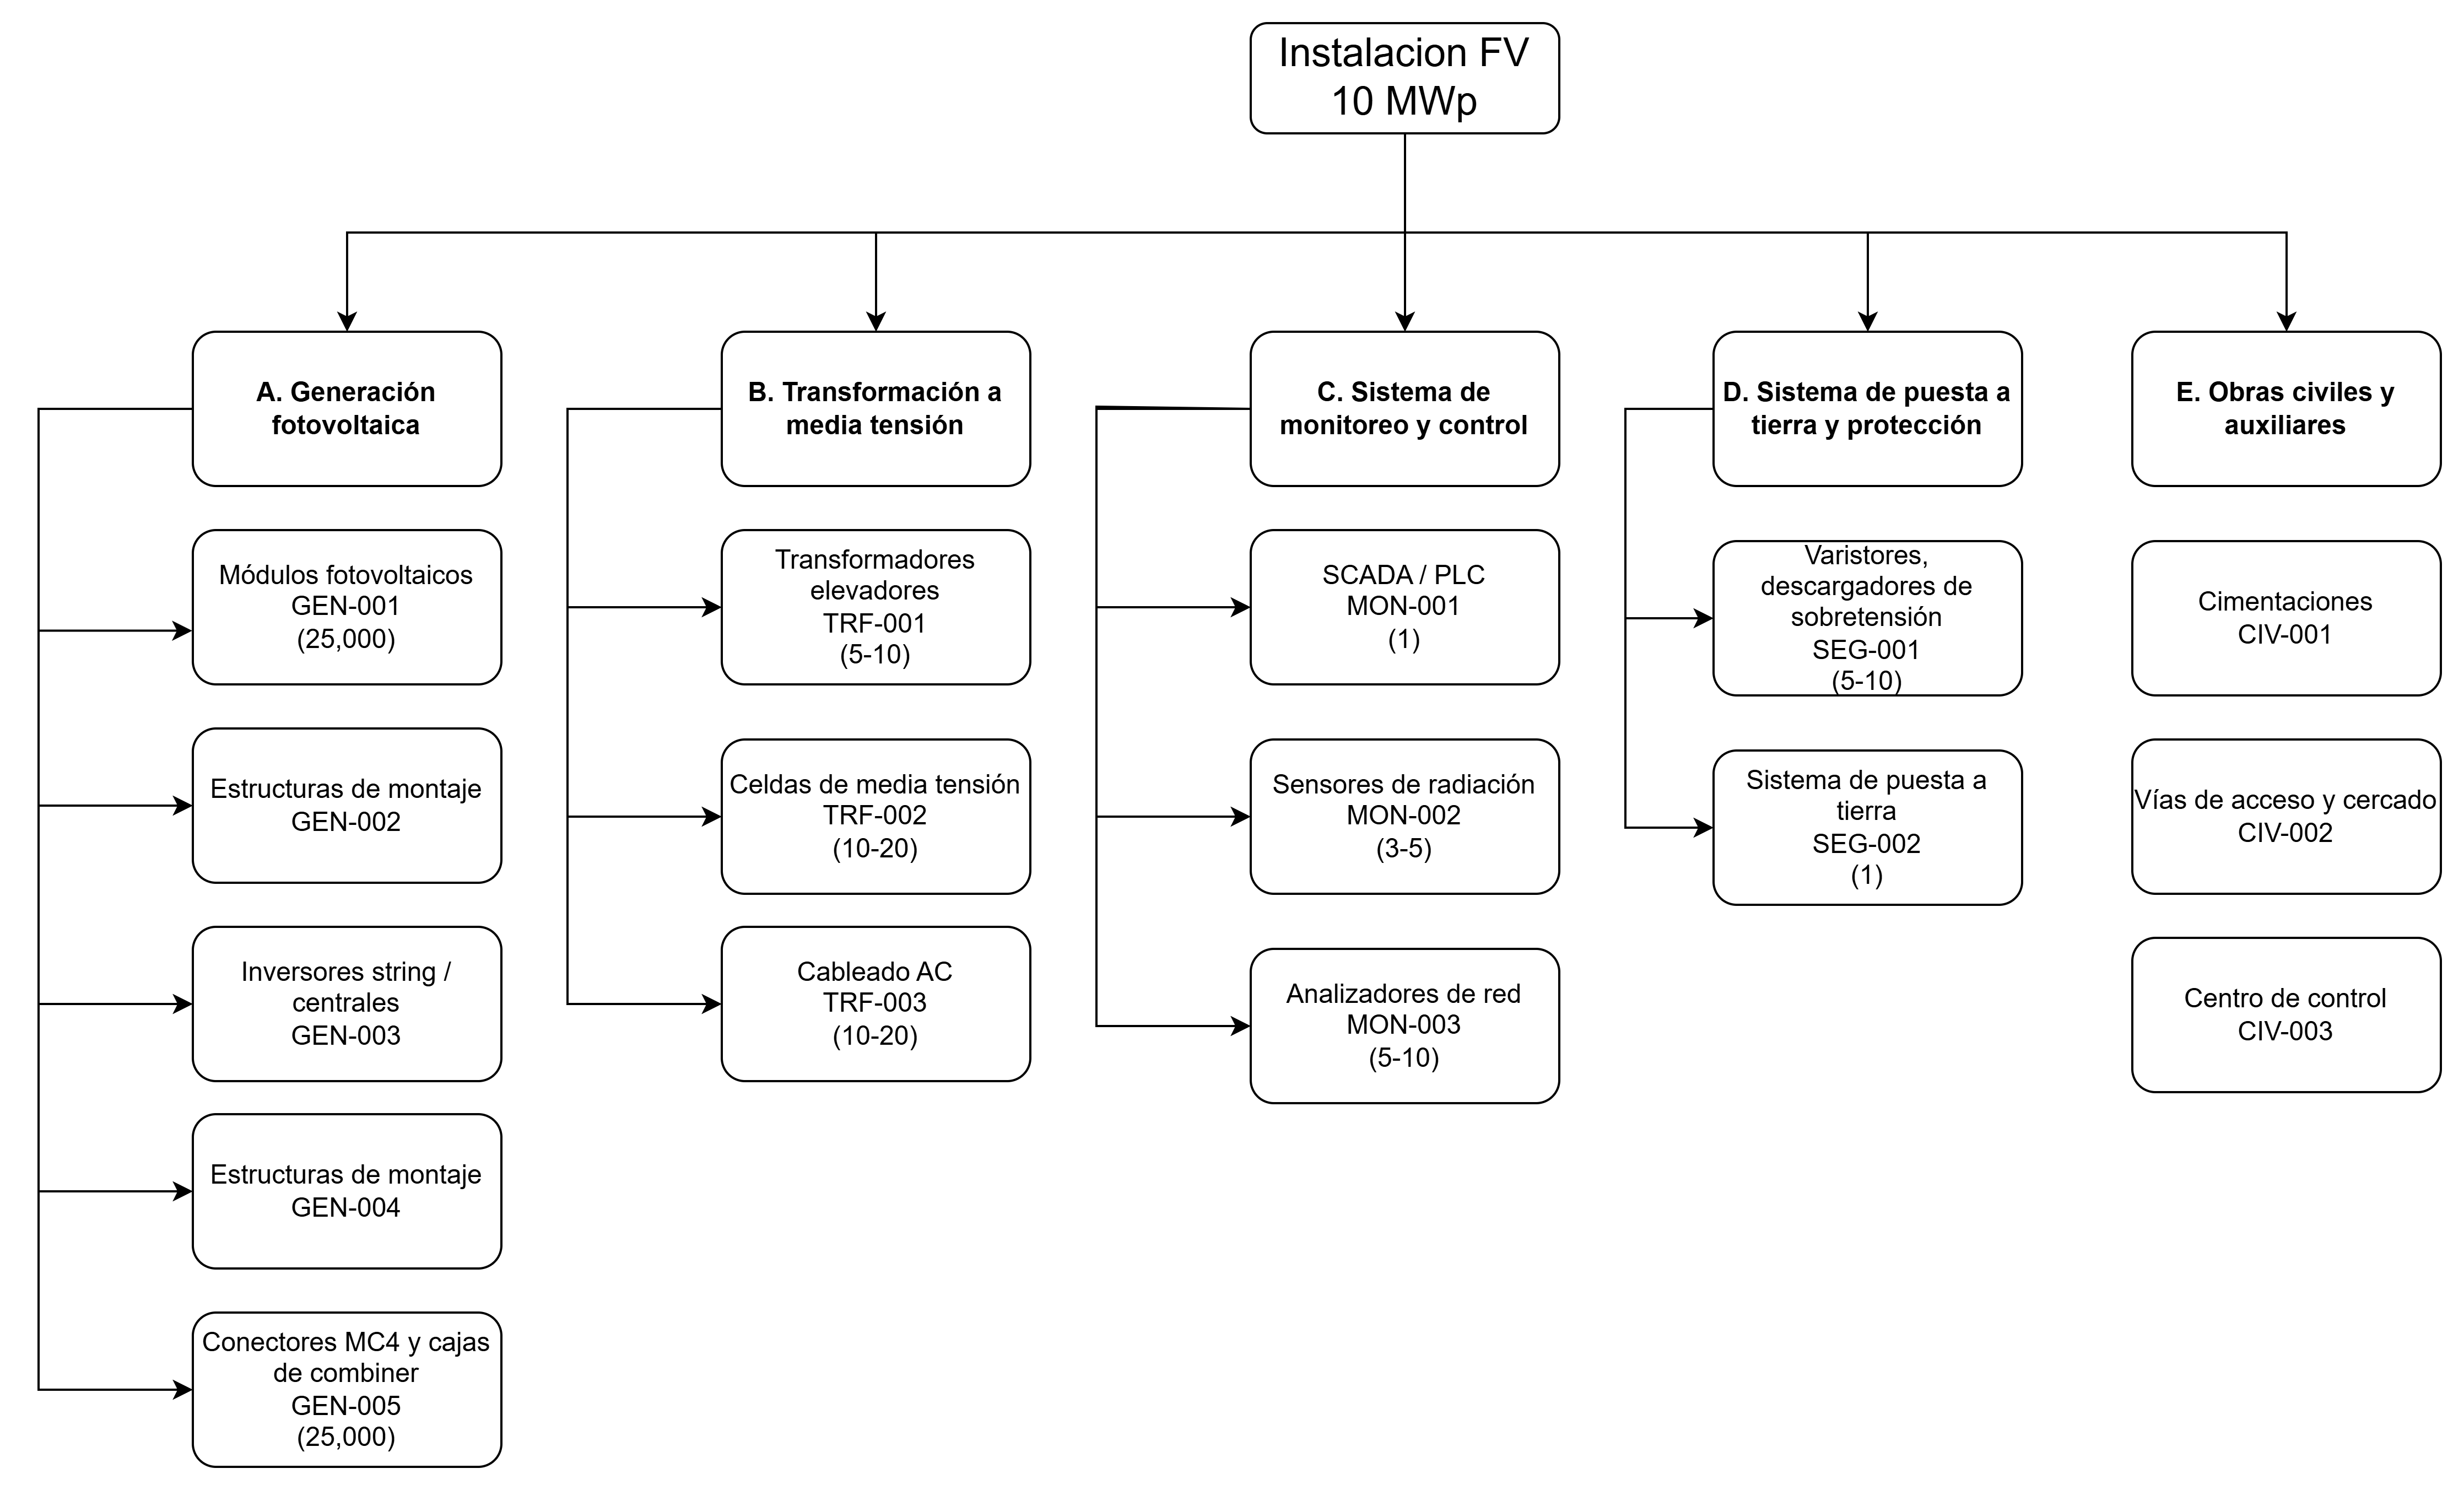

In [139]:
# 📥 Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# Cargar los datos del BOM
df = pd.read_csv('PROY-0001.csv')
df.head()

,Codigo,descripción,componentes,diponibilidad,costo_unitario_usd,proveedor,Tiempo de espera (semanas),Nivel,Tamaño del lote,Recepciones programadas,Subtotal
0,GEN-001,Generación fotovoltaica,Modulos fotovoltaicos,100,1000,Canadian Solar,1,0,100,0,100000
1,GEN-002,Generación fotovoltaica,Estructuras de montaje,1,1500,UNIRAC,1,0,10,0,1500
2,GEN-003,Generación fotovoltaica,Inversores string/centrales,1,5000,Huawei,1,0,1,0,5000
3,GEN-004,Generación fotovoltaica,Estructuras de montaje,6,12000,UNIRAC,1,0,10,0,72000
4,GEN-005,Generación fotovoltaica,Conectores MC4,7,500,MC4,1,0,2,0,3500


In [140]:
# 💰 Cálculo del costo total del Proyecto Fotovoltaico
df['subtotal'] = df['diponibilidad'] * df['costo_unitario_usd']
costo_totalA = df[df['descripción'] == 'Generación fotovoltaica']['subtotal'].sum()
costo_totalB = df[df['descripción'] == 'Transformación a media tensión']['subtotal'].sum()
costo_totalC = df[df['descripción'] == 'Sistema de monitoreo y control']['subtotal'].sum()
costo_totalD = df[df['descripción'] == 'Sistema de puesta a tierra y protección']['subtotal'].sum()
costo_totalE = df[df['descripción'] == 'Obras civiles y auxiliares']['subtotal'].sum()

print(f"Costo total Generación fotovoltaica (nivel 0): ${costo_totalA:.2f}")
print(f"Costo total Transformación a media tensión (nivel 1): ${costo_totalB:.2f}")
print(f"Costo total Sistema de monitoreo y control (nivel 2): ${costo_totalC:.2f}")
print(f"Costo total Sistema de puesta a tierra y protección (nivel 3): ${costo_totalD:.2f}")
print(f"Costo total Obras civiles y auxiliares (nivel 4): ${costo_totalE:.2f}")

Costo total Generación fotovoltaica (nivel 0): $187600.00
Costo total Transformación a media tensión (nivel 1): $11500.00
Costo total Sistema de monitoreo y control (nivel 2): $107200.00
Costo total Sistema de puesta a tierra y protección (nivel 3): $5000.00
Costo total Obras civiles y auxiliares (nivel 4): $3100.00


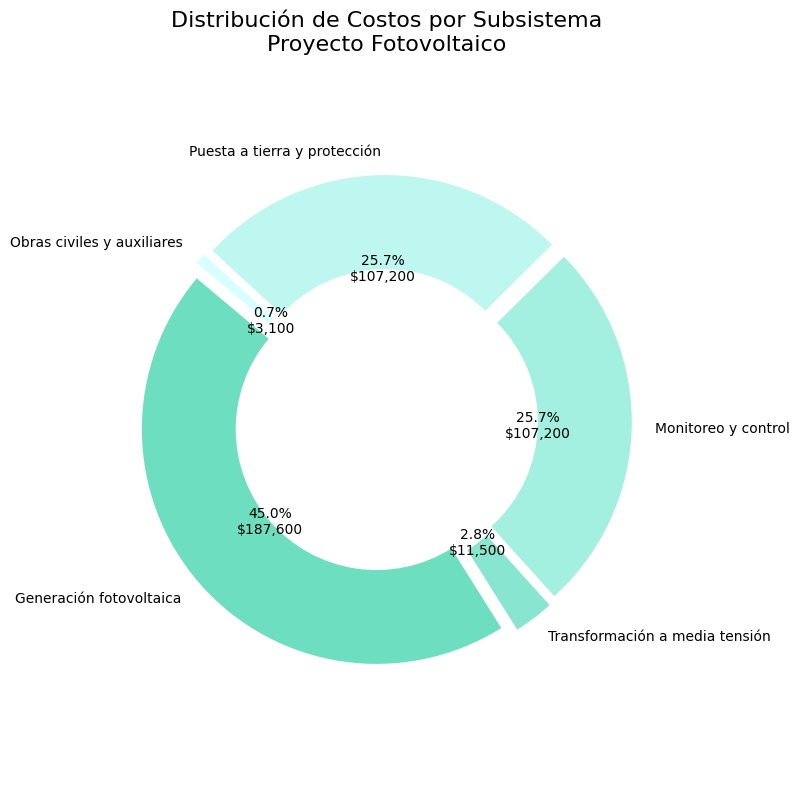

In [141]:
# 1. Datos de costos por subsistema
costos = {
    'Generación fotovoltaica': costo_totalA,
    'Transformación a media tensión': costo_totalB,
    'Monitoreo y control': costo_totalC,
    'Puesta a tierra y protección': costo_totalC,
    'Obras civiles y auxiliares': costo_totalE
}

# 2. Cálculo de proporciones y etiquetas
labels = list(costos.keys())
valores = list(costos.values())
total = sum(valores)
porcentajes = [f'{(v / total) * 100:.1f}%\n${v:,.0f}' for v in valores]  # Etiquetas con % y valor

# 3. Colores personalizados
colors = PaletaDeColores

# 4. Gráfico de pastel
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    valores,
    labels=labels,
    autopct=lambda pct: f'{pct:.1f}%',
    colors=colors,
    startangle=140,
    explode=[0.05]*len(valores),
    wedgeprops={'width': 0.4}
)

# 5. Etiquetas personalizadas combinadas con texto
for i, a in enumerate(autotexts):
    a.set_text(porcentajes[i])
    a.set_fontsize(10)

# 6. Título y estilo
plt.title('Distribución de Costos por Subsistema\nProyecto Fotovoltaico', fontsize=16)
plt.axis('equal')  # Mantener forma circular
plt.tight_layout()
plt.show()


In [142]:
# 📦 Componentes más costosos
componentes_costosos = df.sort_values(by='subtotal', ascending=False)
componentes_costosos[['componentes', 'subtotal']]

,componentes,subtotal
0,Modulos fotovoltaicos,100000
3,Estructuras de montaje,72000
10,Sensores de radiación,50000
11,Analizadores de red,50000
9,SCADA/PLC,7200
5,Cajas de conexion,5600
6,Transformadores elevadores,5000
2,Inversores string/centrales,5000
8,Cableado AC,4000
4,Conectores MC4,3500


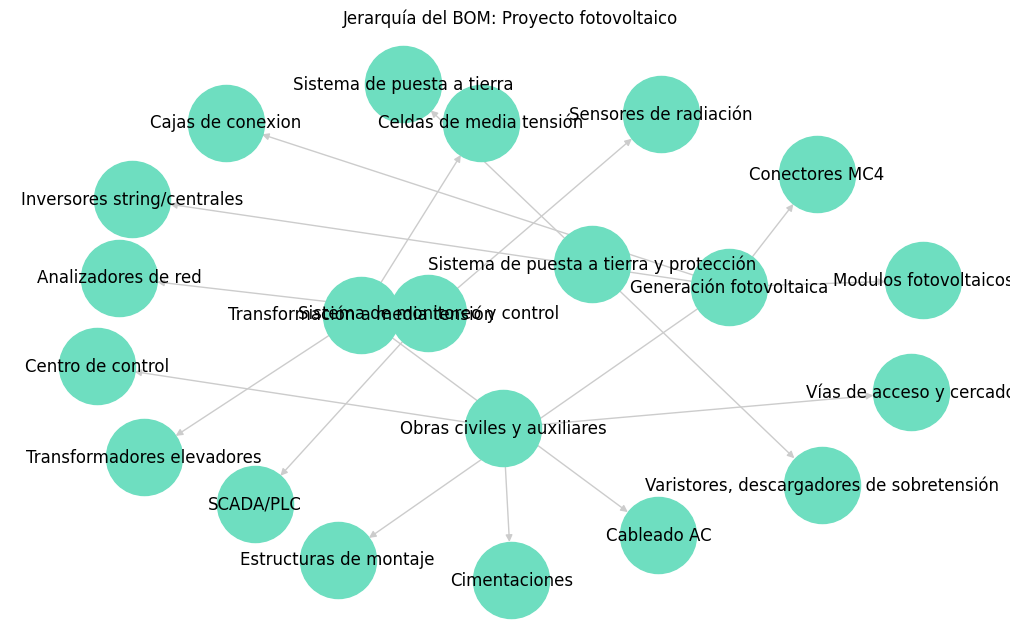

In [144]:
# 🧱 Visualización del árbol de componentes
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['descripción'], row['componentes'], weight=row['diponibilidad'])

plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color= Verde1, node_size=3000, edge_color=GRIS_3)
plt.title("Jerarquía del BOM: Proyecto fotovoltaico")
plt.show()

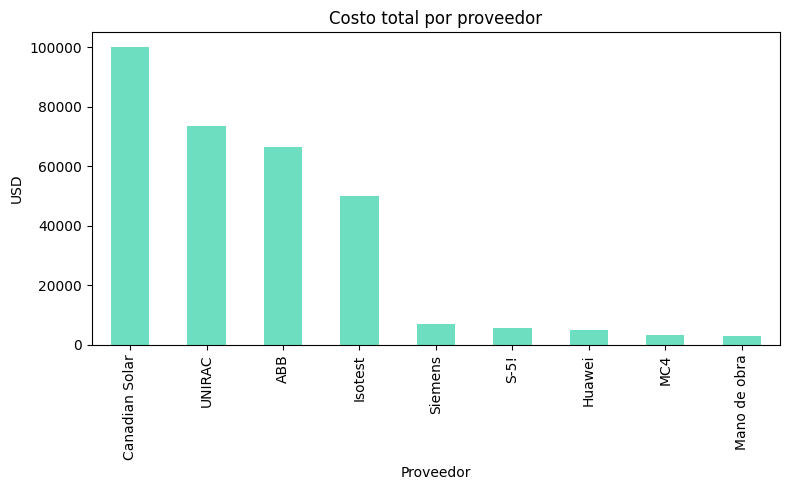

In [145]:
# 📈 Análisis por proveedor
por_proveedor = df.groupby('proveedor')['subtotal'].sum().sort_values(ascending=False)
por_proveedor.plot(kind='bar', title='Costo total por proveedor', ylabel='USD', xlabel='Proveedor', figsize=(8,5), color=Verde1)
plt.tight_layout()
plt.show()

# **MRP**
* ¿Qué es?
Es un sistema o proceso que calcula cuánto y cuándo se deben pedir o fabricar materiales para satisfacer la demanda de productos finales.

* ¿Para qué sirve?
Para planear la producción y los inventarios asegurando que haya materiales suficientes sin tener exceso.

* Entradas del MRP:

  * Demanda del producto final (por ejemplo, pronósticos o pedidos).

  * BOM (lista de materiales).

  * Inventario disponible actual.

  * Tiempos de entrega (lead times).

  * Lote económico (mínimos de producción o compra).

* Salida:
  * Un calendario de órdenes de compra y producción para cada componente.

In [148]:
import pandas as pd

# Crear el DataFrame desde los datos proporcionados
data = {
    "Codigo": ["GEN-001", "GEN-002", "GEN-003", "GEN-004", "GEN-005", "GEN-006",
               "TRF-001", "TRF-002", "TRF-003",
               "MON-001", "MON-002", "MON-003",
               "SEG-001", "SEG-002",
               "CIV-001", "CIV-002", "CIV-003"],
    "descripcion": ["Generación fotovoltaica"] * 6 +
                   ["Transformación a media tensión"] * 3 +
                   ["Sistema de monitoreo y control"] * 3 +
                   ["Sistema de puesta a tierra y protección"] * 2 +
                   ["Obras civiles y auxiliares"] * 3,
    "componentes": ["Modulos fotovoltaicos", "Estructuras de montaje", "Inversores string/centrales",
                    "Estructuras de montaje", "Conectores MC4", "Cajas de conexion",
                    "Transformadores elevadores", "Celdas de media tensión", "Cableado AC",
                    "SCADA/PLC", "Sensores de radiación", "Analizadores de red",
                    "Varistores, descargadores de sobretensión", "Sistema de puesta a tierra",
                    "Cimentaciones", "Vías de acceso y cercado", "Centro de control"],
    "disponibilidad": [100, 1, 1, 6, 7, 7, 5, 5, 1, 6, 5, 1, 2, 3, 1, 1, 1],
    "costo_unitario_usd": [1000, 1500, 5000, 12000, 500, 800, 1000, 500, 4000,
                           1200, 10000, 50000, 1000, 1000, 2000, 500, 600],
    "proveedor": ["Canadian Solar", "UNIRAC", "Huawei", "UNIRAC", "MC4", "S-5!",
                  "ABB", "ABB", "ABB",
                  "Siemens", "ABB", "Isotest",
                  "ABB", "ABB",
                  "Mano de obra", "Mano de obra", "Mano de obra"],
    "Tiempo de espera (semanas)": [1]*17,
    "Nivel": [0]*6 + [1]*3 + [2]*3 + [3]*2 + [4]*3,
    "Tamaño del lote": [100, 10, 1, 10, 2, 1, 1, 1, 1, 1, 1, 1, 10, 10, 10, 1, 1],
    "Recepciones programadas": [0]*17,
    "Subtotal": [100000, 1500, 5000, 72000, 3500, 5600, 5000, 2500, 4000,
                 7200, 50000, 50000, 2000, 3000, 2000, 500, 600]
}

df = pd.DataFrame(data)
df.head()


,Codigo,descripcion,componentes,disponibilidad,costo_unitario_usd,proveedor,Tiempo de espera (semanas),Nivel,Tamaño del lote,Recepciones programadas,Subtotal
0,GEN-001,Generación fotovoltaica,Modulos fotovoltaicos,100,1000,Canadian Solar,1,0,100,0,100000
1,GEN-002,Generación fotovoltaica,Estructuras de montaje,1,1500,UNIRAC,1,0,10,0,1500
2,GEN-003,Generación fotovoltaica,Inversores string/centrales,1,5000,Huawei,1,0,1,0,5000
3,GEN-004,Generación fotovoltaica,Estructuras de montaje,6,12000,UNIRAC,1,0,10,0,72000
4,GEN-005,Generación fotovoltaica,Conectores MC4,7,500,MC4,1,0,2,0,3500


In [149]:
# Paso 1: Crear columna de requerimiento bruto (asumimos 1 unidad requerida del producto final)
df["Requerimiento Bruto"] = 1

# Paso 2: Crear columna de requerimiento neto
df["Requerimiento Neto"] = df["Requerimiento Bruto"] - df["disponibilidad"]
df["Requerimiento Neto"] = df["Requerimiento Neto"].apply(lambda x: x if x > 0 else 0)

# Paso 3: Crear columna de cantidad a ordenar, redondeando hacia el tamaño del lote
import numpy as np
df["Cantidad a Ordenar"] = df.apply(
    lambda row: np.ceil(row["Requerimiento Neto"] / row["Tamaño del lote"]) * row["Tamaño del lote"]
    if row["Requerimiento Neto"] > 0 else 0, axis=1
)

# Paso 4: Crear columna de semana de pedido considerando el tiempo de espera
df["Semana Pedido"] = df["Tiempo de espera (semanas)"].apply(lambda x: f"Semana -{x}")

# Seleccionamos columnas relevantes para el reporte
mrp_resultado = df[[
    "Codigo", "componentes", "Nivel", "disponibilidad", "Requerimiento Bruto",
    "Requerimiento Neto", "Cantidad a Ordenar", "Semana Pedido"
]].sort_values(by="Nivel")

mrp_resultado.reset_index(drop=True, inplace=True)
mrp_resultado


,Codigo,componentes,Nivel,disponibilidad,Requerimiento Bruto,Requerimiento Neto,Cantidad a Ordenar,Semana Pedido
0,GEN-001,Modulos fotovoltaicos,0,100,1,0,0,Semana -1
1,GEN-002,Estructuras de montaje,0,1,1,0,0,Semana -1
2,GEN-003,Inversores string/centrales,0,1,1,0,0,Semana -1
3,GEN-004,Estructuras de montaje,0,6,1,0,0,Semana -1
4,GEN-005,Conectores MC4,0,7,1,0,0,Semana -1
5,GEN-006,Cajas de conexion,0,7,1,0,0,Semana -1
6,TRF-001,Transformadores elevadores,1,5,1,0,0,Semana -1
7,TRF-002,Celdas de media tensión,1,5,1,0,0,Semana -1
8,TRF-003,Cableado AC,1,1,1,0,0,Semana -1
9,MON-001,SCADA/PLC,2,6,1,0,0,Semana -1


<ipython-input-154-fe5c5100c54d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Disponibilidad", y="Componente", data=df_mrp.sort_values("Disponibilidad", ascending=False), palette=PaletaDeColores)
<ipython-input-154-fe5c5100c54d>:26: UserWarning: 
The palette list has fewer values (13) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Disponibilidad", y="Componente", data=df_mrp.sort_values("Disponibilidad", ascending=False), palette=PaletaDeColores)


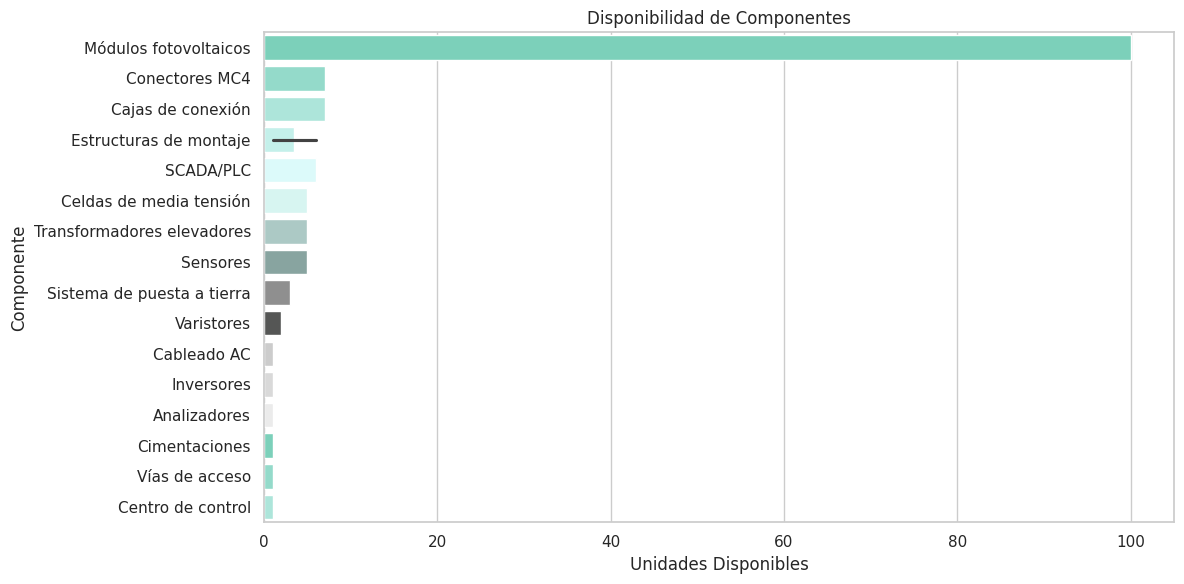

<ipython-input-154-fe5c5100c54d>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nivel_counts.index, y=nivel_counts.values, palette=PaletaDeColores)
<ipython-input-154-fe5c5100c54d>:36: UserWarning: The palette list has more values (13) than needed (5), which may not be intended.
  sns.barplot(x=nivel_counts.index, y=nivel_counts.values, palette=PaletaDeColores)


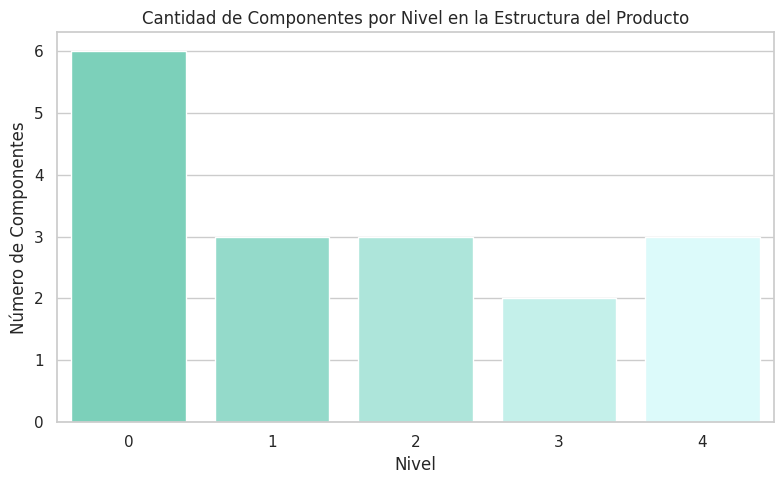

In [154]:
# Datos del análisis MRP realizado
data = {
    "Código": [
        "GEN-001", "GEN-002", "GEN-003", "GEN-004", "GEN-005", "GEN-006",
        "TRF-001", "TRF-002", "TRF-003", "MON-001", "MON-002", "MON-003",
        "SEG-001", "SEG-002", "CIV-001", "CIV-002", "CIV-003"
    ],
    "Componente": [
        "Módulos fotovoltaicos", "Estructuras de montaje", "Inversores", "Estructuras de montaje", "Conectores MC4", "Cajas de conexión",
        "Transformadores elevadores", "Celdas de media tensión", "Cableado AC", "SCADA/PLC", "Sensores", "Analizadores",
        "Varistores", "Sistema de puesta a tierra", "Cimentaciones", "Vías de acceso", "Centro de control"
    ],
    "Nivel": [0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4],
    "Disponibilidad": [100, 1, 1, 6, 7, 7, 5, 5, 1, 6, 5, 1, 2, 3, 1, 1, 1],
    "Requerimiento Bruto": [1]*17,
    "Requerimiento Neto": [0]*17
}

df_mrp = pd.DataFrame(data)

# Configurar estilo de gráfico
sns.set(style="whitegrid")

# Gráfico 1: Disponibilidad vs Componentes
plt.figure(figsize=(12, 6))
sns.barplot(x="Disponibilidad", y="Componente", data=df_mrp.sort_values("Disponibilidad", ascending=False), palette=PaletaDeColores)
plt.title("Disponibilidad de Componentes")
plt.xlabel("Unidades Disponibles")
plt.ylabel("Componente")
plt.tight_layout()
plt.show()

# Gráfico 2: Nivel vs Cantidad de Componentes
plt.figure(figsize=(8, 5))
nivel_counts = df_mrp['Nivel'].value_counts().sort_index()
sns.barplot(x=nivel_counts.index, y=nivel_counts.values, palette=PaletaDeColores)
plt.title("Cantidad de Componentes por Nivel en la Estructura del Producto")
plt.xlabel("Nivel")
plt.ylabel("Número de Componentes")
plt.tight_layout()
plt.show()


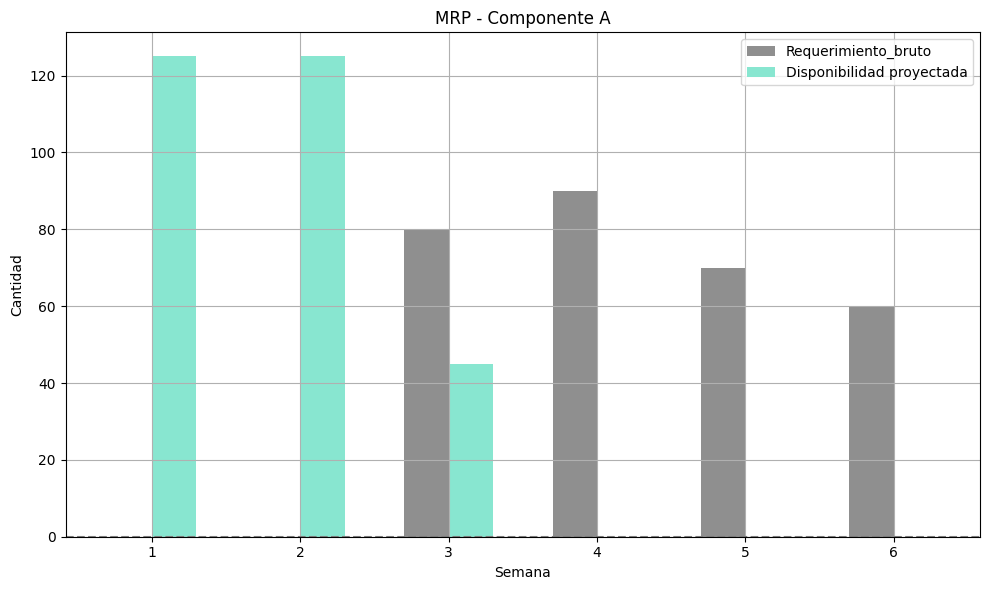

In [121]:
# Ejemplo para el componente A
data_a = {
    'Semana': [1, 2, 3, 4, 5, 6],
    'Requerimiento_bruto': [0, 0, 80, 90, 70, 60],
    'Disponibilidad_proyectada': [125, 125, 45, 0, 0, 0]
}

df_a = pd.DataFrame(data_a)

plt.figure(figsize=(10,6))
plt.bar(df_a['Semana'] - 0.15, df_a['Requerimiento_bruto'], width=0.3, label='Requerimiento_bruto', color=Verde9)
plt.bar(df_a['Semana'] + 0.15, df_a['Disponibilidad_proyectada'], width=0.3, label='Disponibilidad proyectada', color=Verde2)
plt.axhline(0, color='gray', linestyle='--')
plt.title('MRP - Componente A')
plt.xlabel('Semana')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


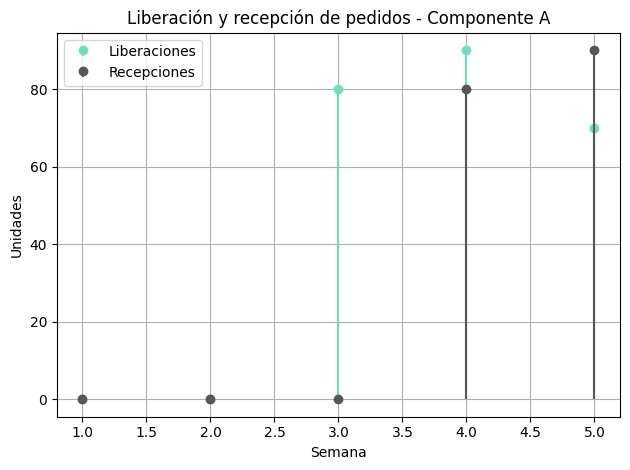

In [ ]:
ordenes = {
    'Semana': [1, 2, 3, 4, 5],
    'Liberaciones': [0, 0, 80, 90, 70],
    'Recepciones': [0, 0, 0, 80, 90],
}

df_o = pd.DataFrame(ordenes)

plt.stem(df_o['Semana'], df_o['Liberaciones'], linefmt=Verde1, markerfmt=Verde1, basefmt=" ", label='Liberaciones')
plt.stem(df_o['Semana'], df_o['Recepciones'], linefmt=GRIS_4, markerfmt=GRIS_4, basefmt=" ", label='Recepciones')

plt.title('Liberación y recepción de pedidos - Componente A')
plt.xlabel('Semana')
plt.ylabel('Unidades')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [97]:
print(df_a.columns)

Index(['Semana', 'Requerimiento_bruto', 'Disponibilidad_proyectada'], dtype='object')


In [156]:
df_a['Bajo_seguridad'] = df_a['Disponibilidad_proyectada'] < 10

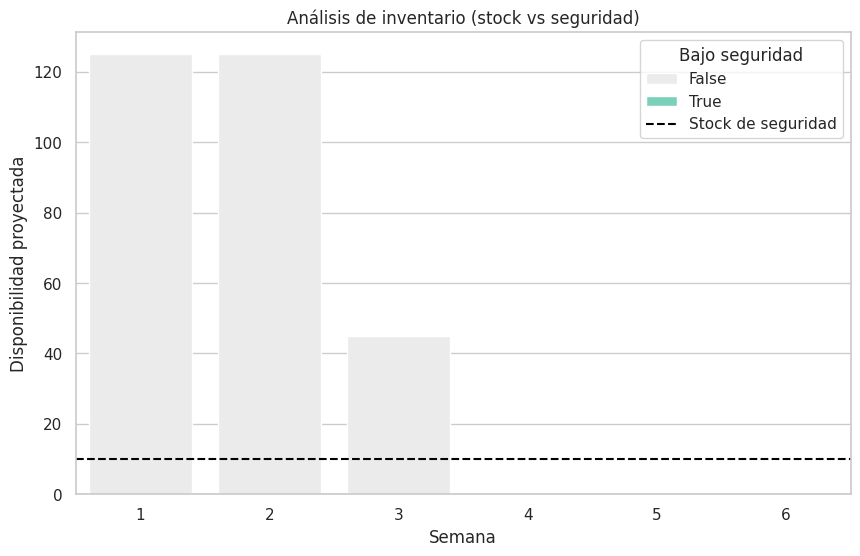

In [157]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_a,
    x='Semana',
    y='Disponibilidad_proyectada',
    hue='Bajo_seguridad',  # Ahora sí existe
    palette={True: Verde1, False: GRIS_1}
)
plt.axhline(10, color='black', linestyle='--', label='Stock de seguridad')
plt.xlabel('Semana')
plt.ylabel('Disponibilidad proyectada')
plt.title('Análisis de inventario (stock vs seguridad)')
plt.legend(title='Bajo seguridad')
plt.show()


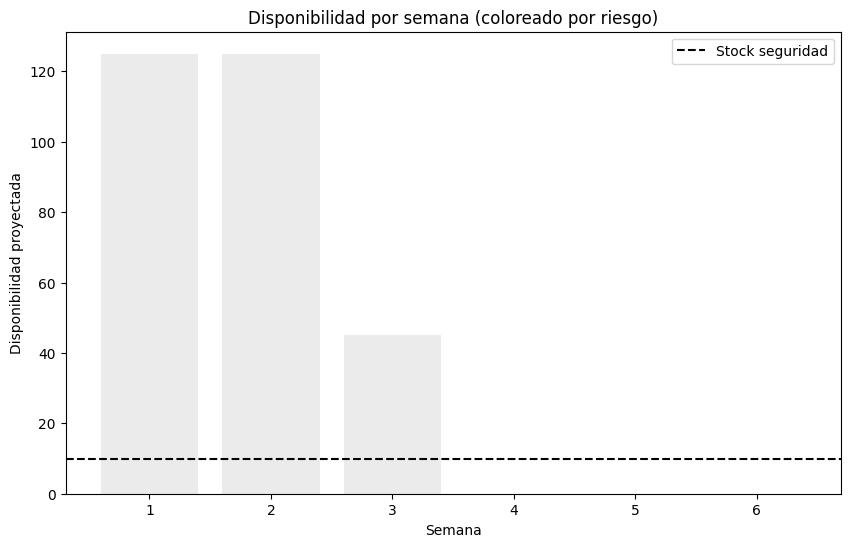

In [100]:
colors = df_a['Bajo_seguridad'].map({True: Verde1, False: GRIS_1})

plt.figure(figsize=(10,6))
plt.bar(df_a['Semana'], df_a['Disponibilidad_proyectada'], color=colors)
plt.axhline(10, color='black', linestyle='--', label='Stock seguridad')
plt.xlabel('Semana')
plt.ylabel('Disponibilidad proyectada')
plt.title('Disponibilidad por semana (coloreado por riesgo)')
plt.legend()
plt.show()


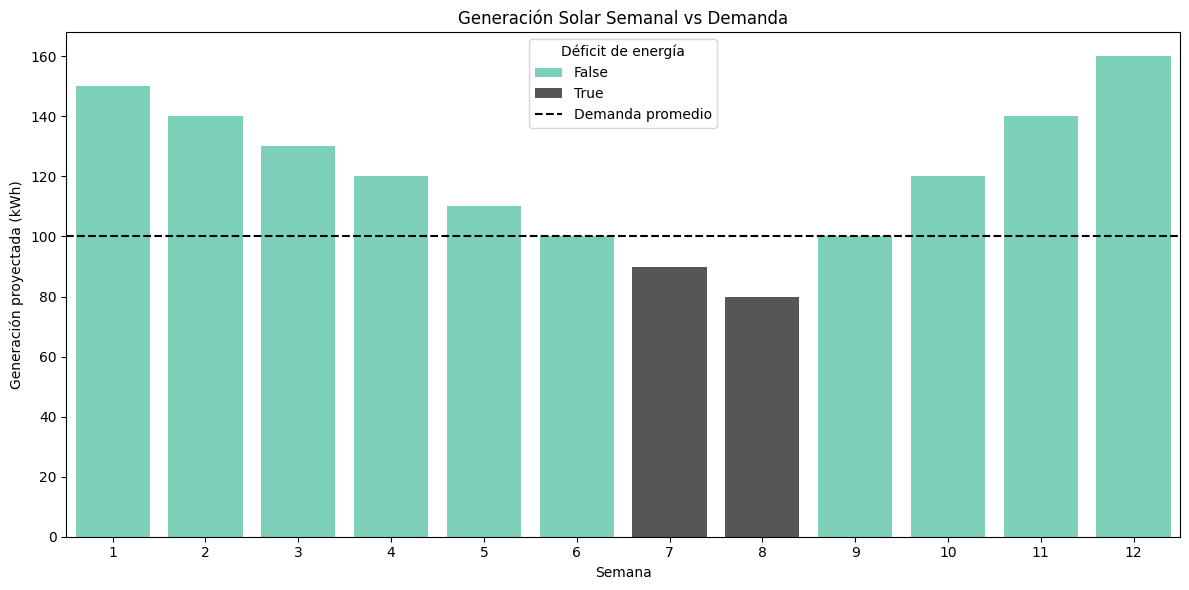

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo simulado
df = pd.DataFrame({
    'Semana': range(1, 13),
    'Generacion_proyectada': [150, 140, 130, 120, 110, 100, 90, 80, 100, 120, 140, 160],
    'Demanda': [100]*12,
})
df['Deficit'] = df['Generacion_proyectada'] < df['Demanda']

# Gráfico con color dependiendo si hay déficit
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='Semana',
    y='Generacion_proyectada',
    hue='Deficit',
    palette={True: GRIS_4, False: Verde1}
)
plt.axhline(df['Demanda'].mean(), color='black', linestyle='--', label='Demanda promedio')
plt.xlabel('Semana')
plt.ylabel('Generación proyectada (kWh)')
plt.title('Generación Solar Semanal vs Demanda')
plt.legend(title='Déficit de energía')
plt.tight_layout()
plt.show()


# Conclusiones

## 1. Falta de Inventario en Componentes Críticos
Algunos componentes clave tienen muy baja disponibilidad, por ejemplo:

Inversores string/centrales (GEN-003): Solo hay 1 unidad, y se requiere al menos 1.

Cableado AC (TRF-003): Solo hay 1 unidad, y se necesita para la transformación.

Analizadores de red (MON-003): Solo 1 en inventario, pero son costosos y de largo plazo de entrega (2 semanas).

👉 Conclusión: Necesitas emitir órdenes de compra lo antes posible para evitar retrasos críticos.

## 📦 2. Sobreinversión en algunos materiales
Módulos fotovoltaicos (GEN-001) tienen 100 unidades disponibles (que coincide con el tamaño del lote), pero en contraste, otras partes del sistema no están igualmente abastecidas.

Las estructuras de montaje (GEN-004) tienen un costo unitario alto y hay 6 unidades en inventario, lo que representa una gran inversión sin una sincronización clara con la necesidad real.

👉 Conclusión: Revisa la sincronización entre disponibilidad y requerimientos reales. Podrías estar almacenando demasiado inventario en unos niveles y descuidando otros.

## 🏗️ 3. Distribución de componentes por nivel
Los niveles más altos (0, 1 y 2) concentran la mayor parte del costo y número de componentes.

Nivel 0: Generación fotovoltaica (paneles, inversores, estructura).

Nivel 1 y 2: Transformación eléctrica y monitoreo.

Nivel 3 y 4: Seguridad y obras civiles, tienen menos impacto en costos, pero son necesarios para el funcionamiento del sistema.

👉 Conclusión: El diseño modular es adecuado, pero se recomienda priorizar la adquisición de componentes de nivel 0 a 2 en términos de logística y abastecimiento.

## ⏳ 4. Tiempos de entrega similares, salvo una excepción
Casi todos los componentes tienen un tiempo de entrega de 1 semana, excepto:

Analizadores de red (MON-003) con 2 semanas de espera.

👉 Conclusión: Planifica con más anticipación la compra de estos equipos, ya que podrían afectar el cronograma general si no se adquieren con antelación.

## 💵 5. Concentración de costos
Los componentes de monitoreo y control tienen un alto impacto económico a pesar de tener pocas unidades (MON-002 y MON-003).

Ejemplo: El analizador de red cuesta $50,000 por unidad.

👉 Conclusión: Estos componentes requieren una justificación de inversión, y podrían representar puntos críticos si se pierden o fallan.